In [1]:
import numpy as np
import urllib
import scipy.optimize
import random
from math import exp
from math import log

In [2]:
def parseData(fname):
    for l in urllib.urlopen(fname):
        yield eval(l)

print "Reading data..."
data = list(parseData("http://jmcauley.ucsd.edu/cse190/data/beer/beer_50000.json"))
print "done"

Reading data...
done


In [3]:
#create binary feature for beer
for i in range(len(data)):
    if data[i]['beer/style'] == 'American IPA':
        data[i]['is American IPA']=1
    else:
        data[i]['is American IPA']=0
    

In [4]:
X=[[1,b['review/taste'],b['review/appearance'],b['review/aroma'],b['review/palate']
   ,b['review/overall']]for b in data]
y = [int(b['beer/ABV']>=6.5) for b in data]

In [5]:
X_train=X[0:len(X)/3]
y_train=y[0:len(X)/3]
X_valid=X[len(X)/3:len(X)/3*2]
y_valid=y[len(X)/3:len(X)/3*2]
X_test=X[len(X)/3*2:]
y_test=y[len(X)/3*2:]

In [6]:
def inner(x,y):
    return sum([x[i]*y[i] for i in range(len(x))])

def sigmoid(x):
    return 1.0 / (1 + exp(-x))

##################################################
# Logistic regression by gradient ascent         #
##################################################

# NEGATIVE Log-likelihood
def f(theta, X, y, lam):
    loglikelihood = 0
    #weight=np.array([1,0.8,0.8,0.8,1,1])
    for i in range(len(X)):
        logit = inner(X[i], theta)
        loglikelihood -= log(1 + exp(-logit))
        if not y[i]:
            loglikelihood -= logit
    for k in range(len(theta)):
        loglikelihood -= lam * theta[k]*theta[k]
  # for debugging
    #print("ll =" + str(loglikelihood))
    return -loglikelihood

# NEGATIVE Derivative of log-likelihood
def fprime(theta, X, y, lam):
    dl = [0]*len(theta)
    for i in range(len(X)):
        logit = inner(X[i], theta)
        for k in range(len(theta)):
            dl[k] += X[i][k] * (1 - sigmoid(logit))
            if not y[i]:
                dl[k] -= X[i][k]
    for k in range(len(theta)):
        dl[k] -= lam*2*theta[k]
    return np.array([-x for x in dl])

# X_train = X
# y_train = y

##################################################
# Train                                          #
##################################################

def train(lam):
    theta,_,_ = scipy.optimize.fmin_l_bfgs_b(f, [0]*len(X_train[0]), fprime, pgtol = 10, args = (X_train, y_train, lam))
    return theta

##################################################
# Predict                                        #
##################################################

def performance(theta):
    scores = [inner(theta,x) for x in X_train]
    predictions = [s > 0 for s in scores]
    correct = [(a==b) for (a,b) in zip(predictions,y_train)]
    acc = sum(correct) * 1.0 / len(correct)
    return acc
def performance_valid(theta):
    scores = [inner(theta,x) for x in X_valid]
    predictions = [s > 0 for s in scores]
    correct = [(a==b) for (a,b) in zip(predictions,y_valid)]
    acc = sum(correct) * 1.0 / len(correct)
    return acc
def performance_test(theta):
    scores = [inner(theta,x) for x in X_test]
    predictions = [s > 0 for s in scores]
    correct = [(a==b) for (a,b) in zip(predictions,y_test)]
    acc = sum(correct) * 1.0 / len(correct)
    return acc
##################################################
# Validation pipeline                            #
##################################################

lam = 1.0

theta = train(lam)
acc = performance(theta)
acc1 = performance_valid(theta)
acc2 = performance_test(theta)

print("lambda = " + str(lam) + ":\t training accuracy=" + str(acc))
print 'validation set accuracy',acc1
print 'test set accuracy',acc2


lambda = 1.0:	 training accuracy=0.669866794672
validation set accuracy 0.90027601104
test set accuracy 0.577813774898


In [7]:
#Q2 count ten words
tenwords=["lactic", "tart", "sour", "citric", "sweet", "acid", "hop", "fruit", "salt", "spicy"]

In [8]:
#use stemmer to do the word count
import nltk
from nltk.stem.porter import *
from collections import defaultdict
import string

In [9]:
stemmer = PorterStemmer()
punctuation = set(string.punctuation)
def feature(datum):
    feat = [1]
    wordCount = defaultdict(int)
    for w in datum['review/text'].split():
        w = ''.join([c for c in w.lower() if not c in punctuation])
        w = stemmer.stem(w)
        wordCount[w] += 1
    for i in range(10):
        feat.append(wordCount[tenwords[i]])
    return feat

In [ ]:
def:
    r=
    words=r.split()
    for w in words:
        if w in tenwords:
            feat[wordId[w]]+=1
    feat.append(1)

In [10]:
X = [feature(d) for d in data]
y = [int(b['beer/ABV']>=6.5) for b in data]

In [11]:
#shuffle data
total=X
for i in range(len(X)):
    total[i]=X[i]+[y[i]]
np.random.shuffle(total)
X=[x[:-1] for x in total]
y=[y[-1] for y in total]

In [12]:
X_train=X[0:len(X)/3]
y_train=y[0:len(X)/3]
X_valid=X[len(X)/3:len(X)/3*2]
y_valid=y[len(X)/3:len(X)/3*2]
X_test=X[len(X)/3*2:]
y_test=y[len(X)/3*2:]

In [13]:
lam = 1
theta = train(lam)
acc = performance(theta)
acc1 = performance_valid(theta)
acc2 = performance_test(theta)

print("lambda = " + str(lam) + ":\t training accuracy=" + str(acc))
print 'validation set accuracy',acc1
print 'test set accuracy',acc2

lambda = 1:	 training accuracy=0.623484939398
validation set accuracy 0.620124804992
test set accuracy 0.626469882409


In [14]:
######Q3
scores = [inner(theta,x) for x in X_test]
TP,TN,FP,FN=0,0,0,0
for i in range(len(scores)):
    if scores[i]>0 and y_test[i]==1:
         TP+=1
    elif  scores[i]<0 and y_test[i]==0:
         TN+=1
    elif  scores[i]>0 and y_test[i]==0:
         FP+=1
    elif scores[i]<0 and y_test[i]==1:
         FN+=1
print "True Postive is",TP
print "True Negative is",TN
print "False Postive is",FP
print "False Negative is",FN


True Postive is 10397
True Negative is 45
False Postive is 6175
False Negative is 51


In [15]:
TPR=(TP)*1.0/(TP+FN)
TNR=(TN)*1.0/(TN+FP)
BER=1-(TPR+TNR)/2
print "BER is",BER

BER is 0.498823295155


In [16]:
######## Q4
def f(theta, X, y, lam):
    #weight=np.array([1,0.8,0.7,1.1,0.5,1.9,0.8,0.8,1.1,0.9,0.9])
    N=len(y)
    w1=N*1.0/(2*sum(y))
    w2=N*1.0/((len(y)-sum(y))*2)
    loglikelihood = 0
    for i in range(len(X)):
        logit = inner(X[i], theta)
        if y[i]==1:
            loglikelihood += w1*1.0*log(sigmoid(logit))
        if y[i]==0:
            loglikelihood +=w2*1.0*log(1-sigmoid(logit))
    for k in range(len(theta)):
        loglikelihood -= lam * theta[k]*theta[k]
  # for debugging
    #print("ll =" + str(loglikelihood))
    return -loglikelihood                                  
                         
# NEGATIVE Derivative of log-likelihood
def fprime(theta, X, y, lam):
    dl = [0]*len(theta)
    N=len(y)
    w1=N*1.0/(2*sum(y))
    w2=N*1.0/((len(y)-sum(y))*2)
    for i in range(len(X)):
        logit = inner(X[i], theta)
        for k in range(len(theta)):
            if y[i]==1:
                dl[k] += w1*1.0*X[i][k] * (1 - sigmoid(logit))
            if y[i]==0:
                dl[k] -= w2*1.0*(X[i][k]-X[i][k]*(1-sigmoid(logit)))
    for k in range(len(theta)):
        dl[k] -= lam*2*theta[k]
    return np.array([-x for x in dl])


I change the likelihood to weighted likelihood estimate because of inbalance might happen in the calculation.

In [18]:
lam = 1
theta = train(lam)
acc = performance(theta)
acc1 = performance_valid(theta)
acc2 = performance_test(theta)

print("lambda = " + str(lam) + ":\t training accuracy=" + str(acc))
print 'validation set accuracy',acc1
print 'test set accuracy',acc2

lambda = 1:	 training accuracy=0.519980799232
validation set accuracy 0.523520940838
test set accuracy 0.523878089753


In [19]:
scores = [inner(theta,x) for x in X_test]
TP,TN,FP,FN=0,0,0,0
for i in range(len(scores)):
    if scores[i]>0 and y_test[i]==1:
         TP+=1
    elif  scores[i]<0 and y_test[i]==0:
         TN+=1
    elif  scores[i]>0 and y_test[i]==0:
         FP+=1
    elif scores[i]<0 and y_test[i]==1:
         FN+=1
TPR=(TP)*1.0/(TP+FN)
TNR=(TN)*1.0/(TN+FP)
BER=1-(TPR+TNR)/2
print 'BER for test set',BER
scores = [inner(theta,x) for x in X_train]
TP,TN,FP,FN=0,0,0,0
for i in range(len(scores)):
    if scores[i]>0 and y_train[i]==1:
         TP+=1
    elif  scores[i]<0 and y_train[i]==0:
         TN+=1
    elif  scores[i]>0 and y_train[i]==0:
         FP+=1
    elif scores[i]<0 and y_train[i]==1:
         FN+=1
TPR=(TP)*1.0/(TP+FN)
TNR=(TN)*1.0/(TN+FP)
BER=1-(TPR+TNR)/2
print 'BER for train set',BER
scores = [inner(theta,x) for x in X_valid]
TP,TN,FP,FN=0,0,0,0
for i in range(len(scores)):
    if scores[i]>0 and y_valid[i]==1:
         TP+=1
    elif  scores[i]<0 and y_valid[i]==0:
         TN+=1
    elif  scores[i]>0 and y_valid[i]==0:
         FP+=1
    elif scores[i]<0 and y_valid[i]==1:
         FN+=1
TPR=(TP)*1.0/(TP+FN)
TNR=(TN)*1.0/(TN+FP)
BER=1-(TPR+TNR)/2
print 'BER for validation set',BER

BER for test set 0.426758640556
BER for train set 0.432335183423
BER for validation set 0.429846821587


It is clearly to see that BER for train, validation and test set decreases when I change the f to weighted likelihood function.

In [20]:
#####Q5
lamset=[0,0.01,0.1,1,100]
for lamda in lamset:
    theta = train(lamda)
    acc1 = performance_valid(theta)
    print 'when lamda =', lamda
    print 'validation accuracy is ',acc1

when lamda = 0
validation accuracy is  0.523460938438
when lamda = 0.01
validation accuracy is  0.523460938438
when lamda = 0.1
validation accuracy is  0.523460938438
when lamda = 1
validation accuracy is  0.523520940838
when lamda = 100
validation accuracy is  0.557002280091


In [21]:
# when lamda=100, the accuracy is the highest, so I choose lamda=100.
lam = 100
theta = train(lam)
acc = performance(theta)
acc1 = performance_valid(theta)
acc2 = performance_test(theta)

print("lambda = " + str(lam) + ":\t training set accuracy=" + str(acc))
print 'validation set accuracy',acc1
print 'test set accuracy',acc2

scores = [inner(theta,x) for x in X_test]
TP,TN,FP,FN=0,0,0,0
for i in range(len(scores)):
    if scores[i]>0 and y_test[i]==1:
         TP+=1
    elif  scores[i]<0 and y_test[i]==0:
         TN+=1
    elif  scores[i]>0 and y_test[i]==0:
         FP+=1
    elif scores[i]<0 and y_test[i]==1:
         FN+=1
TPR=(TP)*1.0/(TP+FN)
TNR=(TN)*1.0/(TN+FP)
BER=1-(TPR+TNR)/2
print 'BER for test set',BER
scores = [inner(theta,x) for x in X_train]
TP,TN,FP,FN=0,0,0,0
for i in range(len(scores)):
    if scores[i]>0 and y_train[i]==1:
         TP+=1
    elif  scores[i]<0 and y_train[i]==0:
         TN+=1
    elif  scores[i]>0 and y_train[i]==0:
         FP+=1
    elif scores[i]<0 and y_train[i]==1:
         FN+=1
TPR=(TP)*1.0/(TP+FN)
TNR=(TN)*1.0/(TN+FP)
BER=1-(TPR+TNR)/2
print 'BER for train set',BER
scores = [inner(theta,x) for x in X_valid]
TP,TN,FP,FN=0,0,0,0
for i in range(len(scores)):
    if scores[i]>0 and y_valid[i]==1:
         TP+=1
    elif  scores[i]<0 and y_valid[i]==0:
         TN+=1
    elif  scores[i]>0 and y_valid[i]==0:
         FP+=1
    elif scores[i]<0 and y_valid[i]==1:
         FN+=1
TPR=(TP)*1.0/(TP+FN)
TNR=(TN)*1.0/(TN+FP)
BER=1-(TPR+TNR)/2
print 'BER for validation set',BER

lambda = 100:	 training set accuracy=0.554722188888
validation set accuracy 0.557002280091
test set accuracy 0.56089512839
BER for test set 0.413496359863
BER for train set 0.421033179548
BER for validation set 0.418501881335


In [22]:
####Q6
from sklearn.decomposition import PCA
from collections import defaultdict

In [23]:
stemmer = PorterStemmer()
punctuation = set(string.punctuation)
def feature(datum):
    feat = [1]
    wordCount = defaultdict(int)
    for w in datum['review/text'].split():
        w = ''.join([c for c in w.lower() if not c in punctuation])
        w = stemmer.stem(w)
        wordCount[w] += 1
#     for i in range(10):
#         feat.append(datum['review/text'].count(tenwords[i]))
    for i in range(10):
        feat.append(wordCount[tenwords[i]])
    return feat
X = [feature(d) for d in data]
y = [(b['is American IPA']) for b in data]

In [24]:
###shuffle the data and split data
total=X
for i in range(len(X)):
    total[i]=X[i]+[y[i]]
np.random.shuffle(total)
X=[x[:-1] for x in total]
y=[y[-1] for y in total]
X_train=X[0:len(X)/3]
y_train=y[0:len(X)/3]
X_valid=X[len(X)/3:len(X)/3*2]
y_valid=y[len(X)/3:len(X)/3*2]
X_test=X[len(X)/3*2:]
y_test=y[len(X)/3*2:]

In [25]:
pca = PCA(n_components=11)
pca.fit(X_train)####Q6
print 'The PCA components are',pca.components_

The PCA components are [[ -0.00000000e+00  -5.61152582e-04  -1.07405301e-02  -1.01657294e-02
    1.10541982e-02   1.78456943e-01   1.44357345e-03   9.83695316e-01
    1.23817436e-02  -6.44173586e-05   1.93576029e-04]
 [ -0.00000000e+00   5.61059696e-04   4.64347572e-02   1.04931403e-02
   -1.24862372e-03   9.76817422e-01   4.56399731e-03  -1.77957496e-01
    1.08948333e-01  -8.88548944e-06   3.42896278e-04]
 [  0.00000000e+00   3.30573573e-03   1.23914265e-01   6.27712202e-02
    1.40423801e-03  -1.14420628e-01   8.59704989e-03   1.03527390e-02
    9.83573800e-01   1.02275226e-03  -7.03555154e-04]
 [  0.00000000e+00   1.71603841e-02   6.95193880e-01   7.03438675e-01
    7.95160567e-03  -2.19673416e-02   4.69117299e-02   2.04051085e-02
   -1.35725802e-01   6.04907220e-04   5.39922308e-04]
 [  0.00000000e+00   4.17530346e-03  -7.06309777e-01   7.05292580e-01
    5.11126900e-03   1.98564949e-02   3.32266351e-02  -4.70908577e-03
    4.60230275e-02  -1.78182764e-03   1.88658787e-03]
 [ -0.0

In [26]:
####Q7
pca = PCA(n_components=2)
pca.fit(X_train)####Q6
print 'The first 2 PCA components are',pca.components_

The first 2 PCA components are [[ -0.00000000e+00  -5.61152582e-04  -1.07405301e-02  -1.01657294e-02
    1.10541982e-02   1.78456943e-01   1.44357345e-03   9.83695316e-01
    1.23817436e-02  -6.44173586e-05   1.93576029e-04]
 [ -0.00000000e+00   5.61059696e-04   4.64347572e-02   1.04931403e-02
   -1.24862372e-03   9.76817422e-01   4.56399731e-03  -1.77957496e-01
    1.08948333e-01  -8.88548944e-06   3.42896278e-04]]


In [27]:
X_train_pca = pca.fit_transform(X_train)
X_projected = pca.inverse_transform(X_train_pca)
projection_error = ((X_train - X_projected) ** 2).mean()
print "projection error is", projection_error

projection error is 0.0529613511396


In [28]:
###8
#find out the index of if the style of beer is American IPA or not
index1=[]
index2=[]
for i in range(0,16666):
    if y_train[i]==0:
        index1.append(i)
    elif y_train[i]==1:
        index2.append(i)

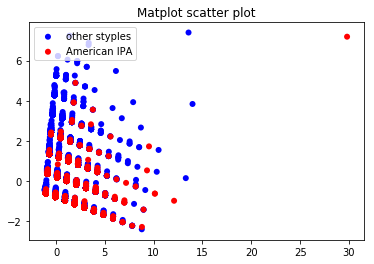

In [30]:
import matplotlib.pyplot as plt
g1=(X_train_pca[index1][:,0],X_train_pca[index1][:,1])
g2=(X_train_pca[index2][:,0],X_train_pca[index2][:,1])
data = (g1, g2)
colors = ("blue", "red")
groups = ("other styples", "American IPA") 
# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
 
for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, c=color, edgecolors='none',label=group)

plt.title('Matplot scatter plot')
plt.legend(loc=2)
plt.show()